# Notebook Description

I put this notebook together to help me learn more about how SNL and CIQ's SQL tables are structured on the back end. In addition, I wanted to create a learning opportunity that allowed me to explore and work directly with our AFL factor data and some of the other data that drives our products. 

This is a notebook that I put together when I was first brought on board in June of 2017. One of the items that I demonstrate in the code below is how some of our clients can take advantage of powerful open source packages that allow them to combine languages such as Python with SQL. 

# Useful resource references

MS SQL Python related info
https://wiki.python.org/moin/SQL%20Server

pymssql docs
http://pymssql.org/en/stable/

Pandas SQL docs
https://pandas.pydata.org/pandas-docs/stable/io.html#io-sql

In [1]:
import talib as ta
from talib import abstract
import time
import pandas as pd
from pandas import DataFrame
from pandas import ExcelWriter
import pandas_datareader.data as wb
#from pandas_datareader import *
#from pandas_datareader import data, wb
#from pandas_datareader import Options
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import norm
from scipy.stats import spearmanr
import sys
import datetime
import os
import time
import matplotlib.cbook as cbook
import csv
import statsmodels.formula.api as sm
import seaborn as sns
import math as mth
from math import exp
import pylab
import pickle
from bs4 import BeautifulSoup
import re
import nltk
import string
import pprint
import sklearn
from sklearn import svm, preprocessing
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import cross_validation
from sklearn import grid_search
from sklearn.cross_validation import cross_val_score, ShuffleSplit, cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import PolynomialFeatures
import sklearn.preprocessing, sklearn.pipeline

import bokeh
from bokeh.plotting import *
from collections import OrderedDict
from bokeh.io import output_notebook
from bokeh.charts import defaults, vplot, hplot, Histogram
from bokeh.models import Toggle, BoxAnnotation, CustomJS
#from bokeh.layouts import layout
from bokeh import mpl
output_notebook()

import plotly
import plotly.graph_objs as go
from plotly.graph_objs import *
import plotly.plotly as py
import plotly.tools as tls
import plotly.offline as offline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import pytz


import cufflinks as cf
import colorlover as cl
#Plotly API Information:(username='asl4af', api_key='7ut55tktdt')
plotly.tools.set_credentials_file(username='asl4af',api_key='7ut55tktdt')

#Make all charts public and set a global theme
cf.set_config_file(world_readable=True,theme='pearl')


#Plotly API Information:(username='asl4af', api_key='7ut55tktdt')
plotly.tools.set_credentials_file(username='asl4af',api_key='V2qbgcFpjyWfQUqfU8XI')

tls.embed('https://plot.ly/~cufflinks/8')
init_notebook_mode(connected=False)


sns.set_style("white")
#sns.set_style("darkgrid")
#sns.set(style="darkgrid", palette="Set2")
#sns.set(style="darkgrid", context="paper", font="monospace")

%matplotlib inline
#mpl.style.use('ggplot')

#import Quandl
import alphalens
import pyfolio as pf

from IPython.display import display

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

ModuleNotFoundError: No module named 'talib'

In [5]:
import pymssql
import pypyodbc
from os import getenv
import _mssql

import pandasql
from pandasql import sqldf
pysqldf = lambda q: slqdf(q, globals())

From what I know now, to make the SQL query text work make sure that you only enter text in one straight line. In other words, don't try to format it using "+" symbols or any other methods. Instead, simply enter the string as one big line even if it starts to go out of the box and off screen.

In [ ]:
# In this cell I define the server, user, password, and database for everything I wasnt to pull from. I excluded them here because they're my personal credentials

For the SNLdb2 server access in the second code block shown above you use your workstation login information even though the MS SQL Server program employs "Windows Authentication" when you initiate a new database engine connection.

In [8]:
conn = 'your personal login credentials'
pysqlconn1 = pymssql.connect(server, user, password, database)
pysqlconn2 = pymssql.connect(server3, user3, password3, database3)
SNLConn1 = pymssql.connect(server=server2, user=user2, password=password2, database=database2)
cursor = pysqlconn1.cursor()
cursor = pysqlconn2.cursor()

MSSQLDriverException: Connection to the database failed for an unknown reason.

In [5]:
cursor.execute('SELECT * FROM ciqAfFactor')

In [6]:
print(cursor.fetchmany(2))

[(2, u'Return on Invested Capital', u'ROIC', 6, u'This factor is the ratio of trailing four quarter after-tax net operating profit to average total invested capital over the same period.', 1001, None), (4, u'Return on Equity', u'ROE', 6, u'The ratio of trailing four quarter income before extraordinary items available for common equity to average book value of common equity over the same period.', 1001, None)]


In [7]:
stmt = "SELECT * FROM ciqAfFactor"

In [8]:
df1 = pd.read_sql(stmt,pysqlconn)

In [9]:
df1

,factorId,factorName,factorAbbreviation,styleId,factorDefinition,factorRelativeId,parentFactorId
0,2,Return on Invested Capital,ROIC,6,This factor is the ratio of trailing four quar...,1001,NaN
1,4,Return on Equity,ROE,6,The ratio of trailing four quarter income befo...,1001,NaN
2,9,Return on Assets,ROA,6,ROA is the ratio of trailing four quarter afte...,1001,NaN
3,11,Cash Flow Return on Invested Capital,CFROIC,6,The factor measures a ratio of trailing four q...,1001,NaN
4,12,Debt to Assets Ratio,DA,6,The ratio of long term and short term debt to ...,1001,NaN
5,13,Long Term Debt to Equity Ratio,LTDE,6,The ratio of long term debt to total sharehold...,1001,NaN
6,14,Capital Acquisition Ratio,CapAcqRatio,6,The factor is a ratio of trailing four quarte...,1001,NaN
7,15,Interest Coverage Ratio,IntCovRatio,6,The ratio of operating income after depreciati...,1001,NaN
8,18,1Y Chg in Shares Outstanding,ShareChg,6,The percentage change in common shares outstan...,1001,NaN
9,21,1Y Chg in Stock Buybacks,BuyBackChg,6,The factor is a percentage change from a year ...,1001,NaN


In [26]:
stmt2 = ("SELECT dth.asofdate, dth.factorid, dth.factorvalue, f.factorname \
         FROM ciqAFValueDailyNA dth \
         inner join ciqAfFactor f on dth.factorid = f.factorid \
         WHERE dth.asOfDate BETWEEN '05/25/2017' and '5/26/2017' \
         and dth.factorid in (91) \
         and dth.GVKey='274934' \
         order by dth.asofdate ASC")

In [10]:
stmt3 = ("SELECT dth.asofdate, dth.factorid, dth.factorvalue \
         FROM ciqAFValueDailyNA dth \
         WHERE dth.asOfDate = '05/01/2017'")
         #"and dth.factorid = 2 "+
         #"and dth.GVKey='006066'")
         #"order by dth.factorid ASC")

In [12]:
df2 = pd.read_sql(stmt3,pysqlconn)

In [13]:
df2.head()

,asofdate,factorid,factorvalue
0,2017-05-01,2,NaN
1,2017-05-01,2,-0.003170
2,2017-05-01,2,NaN
3,2017-05-01,2,-0.071472
4,2017-05-01,2,0.039044


Just a few items that we're going to temporarily exclude from the below code

and dth.factorid in (2,4,9,11,12,13,14,29,31) \

In [24]:
stmt3 = ("SELECT dth.asofdate, dth.factorid, dth.factorvalue, f.factorname \
         FROM ciqAFValueMonthlyNA dth \
         inner join ciqAfFactor f on dth.factorid = f.factorid \
         WHERE dth.asOfDate BETWEEN '01/01/2010' and '5/26/2017' \
         and dth.factorid in (2,4,9,11,12,13,14,18,21,22,29,31,32,34,35,39,40,41,1186,1197) \
         order by dth.asofdate ASC")

In [25]:
%%time
AFL_df = pd.read_sql(stmt3,pysqlconn)

Wall time: 27min


Interesting note on query times for one factor


Global Variables: Wall time: 11min 44s


Local Variables: Wall time: 21.8 s

In [26]:
def afl_data():
    stmt = ("SELECT dth.asofdate, dth.factorvalue, f.factorname, dth.factorid, f.styleId \
            FROM ciqAFValueMonthlyNA dth \
            inner join ciqAfFactor f on dth.factorid = f.factorid \
            WHERE dth.asOfDate BETWEEN '01/01/2010' and '5/26/2017' \
            and dth.factorid in (2,4,9,11,12,13,14,18,21,22,29,31,32,34,35,39,40,41,1186,1197) \
            order by dth.asofdate ASC")
    
    df = pd.read_sql(stmt,pysqlconn)
    return df

In [27]:
%%time
AFL_df = afl_data()

Wall time: 18min 30s


In [28]:
AFL_df.head(10)

,asofdate,factorvalue,factorname,factorid,styleId
0,2010-01-31,NaN,1Y Chg in Stock Buybacks,21,6
1,2010-01-31,-0.815942,1Y Chg in Stock Buybacks,21,6
2,2010-01-31,NaN,1Y Chg in Stock Buybacks,21,6
3,2010-01-31,NaN,1Y Chg in Stock Buybacks,21,6
4,2010-01-31,NaN,1Y Chg in Stock Buybacks,21,6
5,2010-01-31,NaN,1Y Chg in Stock Buybacks,21,6
6,2010-01-31,NaN,1Y Chg in Stock Buybacks,21,6
7,2010-01-31,NaN,1Y Chg in Stock Buybacks,21,6
8,2010-01-31,-0.673714,1Y Chg in Stock Buybacks,21,6
9,2010-01-31,NaN,1Y Chg in Stock Buybacks,21,6


In [29]:
AFL_df.shape

(25579369, 5)

In [35]:
%%time
df_2 = pd.read_sql(stmt4,pysqlconn)

Wall time: 0 ns


In [37]:
%%time
df_4 = pd.read_sql(stmt4,pysqlconn)

Wall time: 11min 20s


In [39]:
%%time
df_9 = pd.read_sql(stmt4,pysqlconn)

Wall time: 6min 19s


In [41]:
df_2.head()
df_4.head()
df_9.head()

,asofdate,factorid,factorvalue,factorname
0,2010-01-31,2,0.037206,Return on Invested Capital
1,2010-01-31,2,0.029619,Return on Invested Capital
2,2010-01-31,2,0.064582,Return on Invested Capital
3,2010-01-31,2,0.088459,Return on Invested Capital
4,2010-01-31,2,0.088459,Return on Invested Capital


,asofdate,factorid,factorvalue,factorname
0,2010-01-31,4,NaN,Return on Equity
1,2010-01-31,4,0.093719,Return on Equity
2,2010-01-31,4,-0.969357,Return on Equity
3,2010-01-31,4,NaN,Return on Equity
4,2010-01-31,4,-10.718500,Return on Equity


,asofdate,factorid,factorvalue,factorname
0,2010-01-31,9,0.059316,Return on Assets
1,2010-01-31,9,-0.053665,Return on Assets
2,2010-01-31,9,NaN,Return on Assets
3,2010-01-31,9,-0.194272,Return on Assets
4,2010-01-31,9,NaN,Return on Assets


In [45]:
df_2.describe()
df_4.describe()
df_9.describe()

,factorid,factorvalue
count,1290634.0,743711.000000
mean,2.0,-0.124615
std,0.0,44.521267
min,2.0,-9452.000000
25%,2.0,-0.083358
50%,2.0,0.049652
75%,2.0,0.119383
max,2.0,10196.000000


,factorid,factorvalue
count,1290634.0,760446.000000
mean,4.0,-0.037880
std,0.0,46.396348
min,4.0,-10736.000000
25%,4.0,-0.140213
50%,4.0,0.052301
75%,4.0,0.153445
max,4.0,13209.900000


,factorid,factorvalue
count,1290634.0,743984.000000
mean,9.0,-6.002706
std,0.0,487.618153
min,9.0,-94360.000000
25%,9.0,-0.118633
50%,9.0,0.012990
75%,9.0,0.061276
max,9.0,1366.020000


In [47]:
df_2.shape
df_4.shape
df_9.shape

(1290634, 4)

(1290634, 4)

(1290634, 4)

In [52]:
%%time
df_2.to_csv('AFL_2.csv')
df_4.to_csv('AFL_4.csv')
df_9.to_csv('AFL_4.csv')

Wall time: 8.4 s


In [32]:
df4.describe()

,factorid,factorvalue
count,56170.0,5.337600e+04
mean,91.0,5.116044e+01
std,0.0,6.670071e+03
min,91.0,-1.000000e+00
25%,91.0,-1.428570e-01
50%,91.0,6.890325e-02
75%,91.0,3.338148e-01
max,91.0,1.408450e+06


In [45]:
df2.describe()

,factorid,factorvalue
count,7.346166e+06,2.978995e+06
mean,5.169453e+02,3.986701e+04
std,3.406345e+02,1.545155e+07
min,2.000000e+00,-4.957760e+09
25%,2.120000e+02,-6.832935e-02
50%,5.070000e+02,5.684450e-02
75%,8.640000e+02,6.187980e-01
max,1.201000e+03,8.969220e+09


In [53]:
df2.index = df2['factorid']

In [62]:
df2.shape

(7346166, 3)

In [15]:
stmt_snl = "SELECT top 50 * \
FROM Stocks..Stocks"

In [16]:
df5 = pd.read_sql(stmt_snl,SNLConn1)

In [17]:
df5

,KeyFndgPrice,KeyFndg,PDate,Price,Volume,High,Low,Bid,Ask,UpdOperation,UpdDate,FndgPriceUnsplit,PricingCount,CumulativePrice,CumulativePriceSquared,CumulativePriceCubed,CumulativePriceFourth,KeyCurrency,FndgPriceOpen
0,6352915,101785,1900-01-01,16.250000,3700.0,16.250000,16.250000,None,None,0,2001-01-30 15:44:39.000,None,NaN,NaN,NaN,NaN,NaN,USD,None
1,6361655,101790,1900-01-01,7.250000,10600.0,7.250000,7.250000,None,None,0,2001-01-30 16:26:11.000,None,NaN,NaN,NaN,NaN,NaN,USD,None
2,6329817,101851,1900-01-01,7.000000,4500.0,7.000000,7.000000,None,None,0,2001-01-30 12:47:13.000,None,NaN,NaN,NaN,NaN,NaN,USD,None
3,6360151,101864,1900-01-01,7.000000,200.0,7.000000,7.000000,None,None,0,2001-01-30 16:23:14.000,None,NaN,NaN,NaN,NaN,NaN,USD,None
4,6349342,101985,1900-01-01,6.250000,0.0,NaN,NaN,None,None,0,2001-01-30 15:26:09.000,None,NaN,NaN,NaN,NaN,NaN,USD,None
5,6411993,101988,1900-01-01,4.750000,0.0,NaN,NaN,None,None,0,2001-02-05 11:25:25.000,None,NaN,NaN,NaN,NaN,NaN,USD,None
6,6334283,101992,1900-01-01,31.500000,27600.0,31.500000,31.500000,None,None,0,2001-01-30 13:30:51.000,None,NaN,NaN,NaN,NaN,NaN,USD,None
7,6432198,102028,1900-01-01,6.000000,25200.0,6.000000,6.000000,None,None,0,2001-02-09 13:13:14.000,None,NaN,NaN,NaN,NaN,NaN,USD,None
8,6345100,102080,1900-01-01,21.500000,400.0,21.500000,21.500000,None,None,0,2001-01-30 15:15:42.000,None,NaN,NaN,NaN,NaN,NaN,USD,None
9,6343646,102089,1900-01-01,9.250000,3800.0,9.250000,9.250000,None,None,0,2001-01-30 15:07:45.000,None,NaN,NaN,NaN,NaN,NaN,USD,None


In [22]:
#for i in df5.columns:
#    print(''.join(i))

This is the original statement but we're going to narrow down the number of columns that we want to pull to make things a little more simple.

stmt_snl2 = ("SELECT f.KeyFndg, f.TradingSymbol, s.PDate, s.FndgPriceOpen,s.High,s.Low, s.Price, s.Volume,s.KeyCurrency \
             FROM Stocks..Stocks s \
             join ObjectViews..fndg f on s.KeyFndg=f.KeyFndg \
             join ObjectViews..Instn i on f.KeyInstn=i.KeyInstn \
             WHERE f.KeyInstn = 100382 \
             AND s.pdate BETWEEN '1/1/2010' and '05/31/2017' \
             AND f.KeyFndgType =1 \
             AND f.PrimaryIssue=1 \
             AND f.FndgCurrent=1")

In [72]:
stmt_snl2 = ("SELECT f.KeyFndg, f.TradingSymbol, s.PDate, s.FndgPriceOpen,s.High,s.Low, s.Price, s.Volume \
             FROM Stocks..Stocks s \
             join ObjectViews..fndg f on s.KeyFndg=f.KeyFndg \
             join ObjectViews..Instn i on f.KeyInstn=i.KeyInstn \
             WHERE f.KeyInstn in (100382) \
             AND s.pdate BETWEEN '1/1/2010' and '05/31/2017' \
             AND f.KeyFndgType =1 \
             AND f.PrimaryIssue=1 \
             AND f.FndgCurrent=1")

In [73]:
df6 = pd.read_sql(stmt_snl2,SNLConn1)

In [74]:
df6.head(5)

,KeyFndg,TradingSymbol,PDate,FndgPriceOpen,High,Low,Price,Volume
0,103107,WFC,2010-01-04,27.02,27.48,26.82,27.32,39338101.0
1,103107,WFC,2010-01-05,27.27,28.24,27.24,28.07,55418926.0
2,103107,WFC,2010-01-06,28.03,28.33,27.79,28.11,33239586.0
3,103107,WFC,2010-01-07,28.12,29.43,27.92,29.13,61648945.0
4,103107,WFC,2010-01-08,28.90,29.35,28.60,28.86,35512359.0


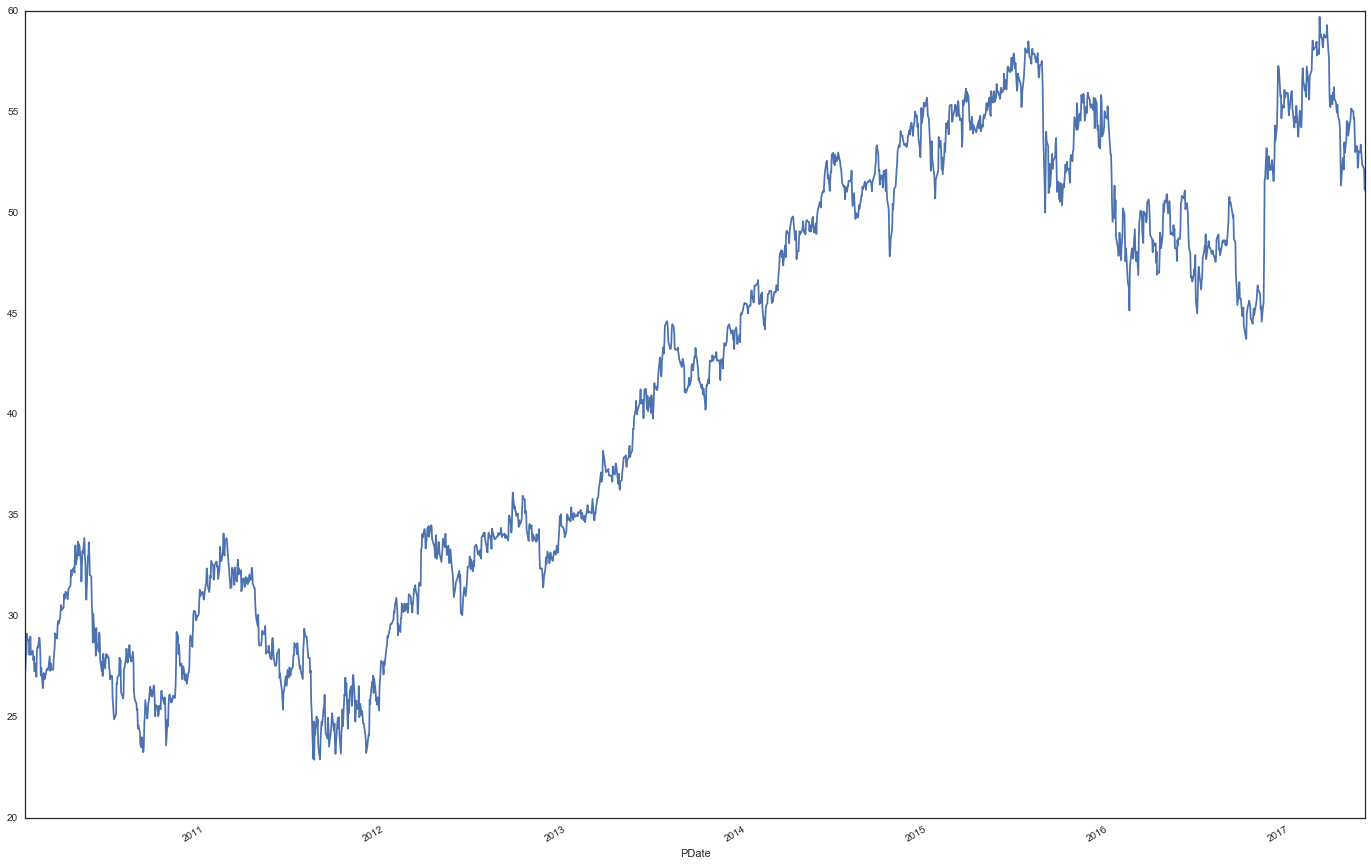

In [78]:
f, ax = plt.subplots(figsize=(24,16))
df6.index=df6['PDate']
df6['Price'].plot()

Some other options that you can use to filter the below query.

--and PricingAsOf between '01/01/2015' and '05/30/2017' \


--and x.KeyIndex=898 \


--and x.IndexPeerGroup='CDX NA' \

In [83]:
stmt_snl3 = ("SELECT w.KeyIndex,x.ShortName,x.IndexPeerGroup,w.KeyCreditDefaultSwap, \
             w.CDSTicker,b.BondTenor,y.Name,w.KeyCurrency,p.* \
             FROM Stocks..CDSPriceFilter p \
             join Stocks..CreditDefaultSwap w on w.keycreditdefaultswap=p.keycreditdefaultswap and w.updoperation<2 \
             join stocks..PriceIndex x on x.keyindex=w.KeyIndex and x.UpdOperation<2 \
             join Lookup..BondTenor b on b.KeyBondTenor=w.KeyBondTenor and b.UpdOperation<2 \
             join Lookup..FndgType y on y.KeyFndgType=w.KeyFndgType and y.UpdOperation<2 \
             WHERE p.UpdOperation<2 \
             and b.BondTenor=5    -- Tenor of the contract in years \
             order by p.PricingAsOf asc,w.KeyFndgType,w.KeyBondTenor")

In [84]:
df7 = pd.read_sql(stmt_snl3,SNLConn1)

In [91]:
def GetData(symbol_list):
    
    for symbol in symbol_list:
        stmt_snl = ("SELECT w.KeyIndex,x.ShortName,x.IndexPeerGroup,w.KeyCreditDefaultSwap, \
                    w.CDSTicker,b.BondTenor,y.Name,w.KeyCurrency,p.* \
                    FROM Stocks..CDSPriceFilter p \
                    join Stocks..CreditDefaultSwap w on w.keycreditdefaultswap=p.keycreditdefaultswap and w.updoperation<2 \
                    join stocks..PriceIndex x on x.keyindex=w.KeyIndex and x.UpdOperation<2 \
                    join Lookup..BondTenor b on b.KeyBondTenor=w.KeyBondTenor and b.UpdOperation<2 \
                    join Lookup..FndgType y on y.KeyFndgType=w.KeyFndgType and y.UpdOperation<2 \
                    WHERE p.UpdOperation<2 \
                    and w.CDSTicker in (%s) \
                    and b.BondTenor=5    -- Tenor of the contract in years \
                    order by p.PricingAsOf asc,w.KeyFndgType,w.KeyBondTenor"%symbol)
    
        data = pd.read_sql(stmt_snl,SNLConn1)
        
        return data
        

In [93]:
#df8 = GetData(['CDXEM20.CDS.5','CDXHY18.CDS.5','CDXHVO18.CDS.5'])

In [120]:
def GetData():
    
    stmt_snl = ("SELECT w.KeyIndex,x.ShortName,x.IndexPeerGroup,w.KeyCreditDefaultSwap, \
                w.CDSTicker,b.BondTenor,y.Name,w.KeyCurrency,p.* \
                FROM Stocks..CDSPriceFilter p \
                join Stocks..CreditDefaultSwap w on w.keycreditdefaultswap=p.keycreditdefaultswap and w.updoperation<2 \
                join stocks..PriceIndex x on x.keyindex=w.KeyIndex and x.UpdOperation<2 \
                join Lookup..BondTenor b on b.KeyBondTenor=w.KeyBondTenor and b.UpdOperation<2 \
                join Lookup..FndgType y on y.KeyFndgType=w.KeyFndgType and y.UpdOperation<2 \
                WHERE p.UpdOperation<2 \
                and w.CDSTicker in ('CDXHY18.CDS.5') \
                and b.BondTenor=5    -- Tenor of the contract in years \
                order by p.PricingAsOf ASC")
    
    data = pd.read_sql(stmt_snl,SNLConn1)
    data.index = data['PricingAsOf']
        
    return data

In [114]:
df8 = GetData()

In [117]:
for i in df8.columns:
    print(''.join(i))

KeyIndex
ShortName
IndexPeerGroup
KeyCreditDefaultSwap
CDSTicker
BondTenor
Name
KeyCurrency
KeyCDSPrice
PricingAsOf
KeyCreditDefaultSwap
CDSParSpreadBid
CDSParSpreadOffer
CDSParSpreadMid
CDSQuoteSpreadBid
CDSQuoteSpreadMid
CDSQuoteSpreadOffer
CDSUpFrontBid
CDSUpFrontMid
CDSUpFrontOffer
CDSPercentOfParBid
CDSPercentOfParMid
CDSPercentOfParOffer
KeyCDSMarketQuotingConvention
KeyCDSPublishLevelMethod
CDSCoupon
CDSDelta
CDSReferenceIndex
CDSRecoveryRate
UpdOperation
UpdDate


In [116]:
df8.head()

,KeyIndex,ShortName,IndexPeerGroup,KeyCreditDefaultSwap,CDSTicker,BondTenor,Name,KeyCurrency,KeyCDSPrice,PricingAsOf,...,CDSPercentOfParMid,CDSPercentOfParOffer,KeyCDSMarketQuotingConvention,KeyCDSPublishLevelMethod,CDSCoupon,CDSDelta,CDSReferenceIndex,CDSRecoveryRate,UpdOperation,UpdDate
PricingAsOf,,,,,,,,,,,,,,,,,,,,,
2013-09-20,898,CDX EM Series 20,CDX EM,8286,CDXEM20.CDS.5,5.0,Senior Debt,USD,8940170,2013-09-20,...,111.20,111.300,3,0,500.0,None,None,25.0,0,2014-09-09 14:23:13
2013-09-23,898,CDX EM Series 20,CDX EM,8286,CDXEM20.CDS.5,5.0,Senior Debt,USD,8940175,2013-09-23,...,111.00,111.080,3,0,500.0,None,None,25.0,0,2014-09-09 14:23:14
2013-09-24,898,CDX EM Series 20,CDX EM,8286,CDXEM20.CDS.5,5.0,Senior Debt,USD,8940180,2013-09-24,...,110.55,110.620,3,0,500.0,None,None,25.0,0,2014-09-09 14:23:14
2013-09-25,898,CDX EM Series 20,CDX EM,8286,CDXEM20.CDS.5,5.0,Senior Debt,USD,8940185,2013-09-25,...,110.55,110.600,3,0,500.0,None,None,25.0,0,2014-09-09 14:23:14
2013-09-26,898,CDX EM Series 20,CDX EM,8286,CDXEM20.CDS.5,5.0,Senior Debt,USD,8940190,2013-09-26,...,110.15,110.235,3,0,500.0,None,None,25.0,0,2014-09-09 14:23:15


In [119]:
df8['CDSQuoteSpreadMid'].head()

PricingAsOf
2013-09-20    263.07
2013-09-23    266.68
2013-09-24    275.60
2013-09-25    275.58
2013-09-26    283.64
Name: CDSQuoteSpreadMid, dtype: float64

In [121]:
df9 = GetData()

In [124]:
AFL_df.head()

,asofdate,factorid,factorvalue,factorname
0,2010-01-31,2,0.037206,Return on Invested Capital
1,2010-01-31,2,0.029619,Return on Invested Capital
2,2010-01-31,2,0.064582,Return on Invested Capital
3,2010-01-31,2,0.088459,Return on Invested Capital
4,2010-01-31,2,0.088459,Return on Invested Capital


In [125]:
AFL_df.shape

(9034438, 4)

In [126]:
#AFL_df.to_csv('AFL_df.csv')

In [127]:
AFL_df.index = AFL_df['factorid']

In [135]:
#x = pd.Series(AFL_df['factorvalue'].loc[2])
#y = pd.Series(AFL_df['factorvalue'].loc[4])

In [139]:
#sns.jointplot(data=AFL_df,x=(AFL_df['factorvalue'].loc[2]),y=(AFL_df['factorvalue'].loc[4]))

In [31]:
AFL_df.head()

,asofdate,factorvalue,factorname,factorid,styleId
0,2010-01-31,NaN,1Y Chg in Stock Buybacks,21,6
1,2010-01-31,-0.815942,1Y Chg in Stock Buybacks,21,6
2,2010-01-31,NaN,1Y Chg in Stock Buybacks,21,6
3,2010-01-31,NaN,1Y Chg in Stock Buybacks,21,6
4,2010-01-31,NaN,1Y Chg in Stock Buybacks,21,6


In [37]:
AFL_PT = AFL_df.pivot_table(columns=['factorname'],values='factorvalue',index='asofdate',aggfunc='median')

In [38]:
AFL_PT.head(5)

factorname,12M - 1M Price Momentum,12M Realized Price Volatility,1M Price High - 1M Price Low,1M Price Reversal,1M Realized Price Volatility,1Y Chg in Shares Outstanding,1Y Chg in Stock Buybacks,Asset Turnover,Book to Price,Capital Acquisition Ratio,Cash Conversion Cycle,Cash Flow Return on Invested Capital,Change of Ownership Level - Hedge Fund,Debt to Assets Ratio,Gross Profit to Assets,Inventory Turnover,Long Term Debt to Equity Ratio,Return on Assets,Return on Equity,Return on Invested Capital
asofdate,,,,,,,,,,,,,,,,,,,,
2010-01-31,0.248576,0.948715,2.000000,0.000000,0.508866,0.004136,-0.914123,0.615868,0.585732,1.310450,42.7859,0.092855,-0.003180,0.149875,0.208556,8.75302,0.163300,0.007630,0.015703,0.033739
2010-02-28,0.377953,0.910881,0.708012,0.000000,0.482048,0.005139,-0.938072,0.613081,0.565908,1.358190,41.7268,0.092455,-0.009090,0.146253,0.207393,8.87092,0.159883,0.008429,0.022739,0.037027
2010-03-31,0.416667,0.839444,0.824561,0.009800,0.445108,0.005784,-0.956873,0.611560,0.539094,1.375140,42.0664,0.091971,-0.005110,0.145651,0.203120,8.86477,0.159615,0.009823,0.028322,0.039011
2010-04-30,0.258741,0.794790,1.000000,0.006221,0.455445,0.006142,-0.956838,0.613061,0.512728,1.398460,42.2415,0.092226,-0.005540,0.143295,0.186696,8.95877,0.162119,0.011061,0.035311,0.041436
2010-05-31,0.217954,0.765967,1.500000,-0.074852,0.609449,0.007158,-0.958518,0.617971,0.561384,1.430905,41.1068,0.094218,-0.002835,0.138432,0.194172,9.22765,0.154467,0.013052,0.040812,0.045755


In [48]:
#AFL_df.to_hdf("C:\Users\zanderl\Documents\AFL_data_raw.hdf",'w')
AFL_PT.shape

(88, 20)

In [49]:
AFL_df.shape

(25579369, 5)

In [50]:
import cPickle

with open(r"AFL_df.pickle","wb") as output_file:
    cPickle.dump(AFL_df,output_file)

In [44]:
for i in AFL_PT.columns:
    print(''.join(i))

12M - 1M Price Momentum
12M Realized Price Volatility
1M Price High - 1M Price Low
1M Price Reversal
1M Realized Price Volatility
1Y Chg in Shares Outstanding
1Y Chg in Stock Buybacks
Asset Turnover
Book to Price
Capital Acquisition Ratio
Cash Conversion Cycle
Cash Flow Return on Invested Capital
Change of Ownership Level - Hedge Fund
Debt to Assets Ratio
Gross Profit to Assets
Inventory Turnover
Long Term Debt to Equity Ratio
Return on Assets
Return on Equity
Return on Invested Capital


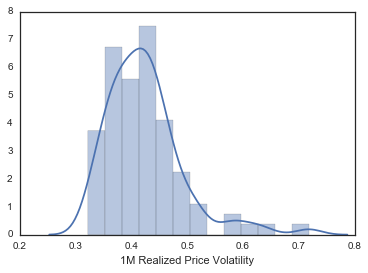

In [43]:
sns.distplot(AFL_PT['1M Realized Price Volatility'])
#AFL_PT['1M Realized Price Volatility'].plot(kind='hist')

In [45]:
AFL_PT['Return on Assets'].iplot(kind='histogram')

PlotlyError: Aw, snap! You tried to use our API as the user 'asl4af', but the supplied API key doesn't match our records. You can view your API key at plot.ly/settings.

You're most likely getting this message because your local credentials file isn't synced with the Plotly server you're communicating with.

Go to plot.ly/<language>/getting-started (e.g., plot.ly/python/getting-started) for more information.

Make sure that you're logged in as asl4af.

Need help? Please try searching Plotly's <a href='http://stackoverflow.com/questions/tagged/plotly'>Stack Overflow channel</a>.

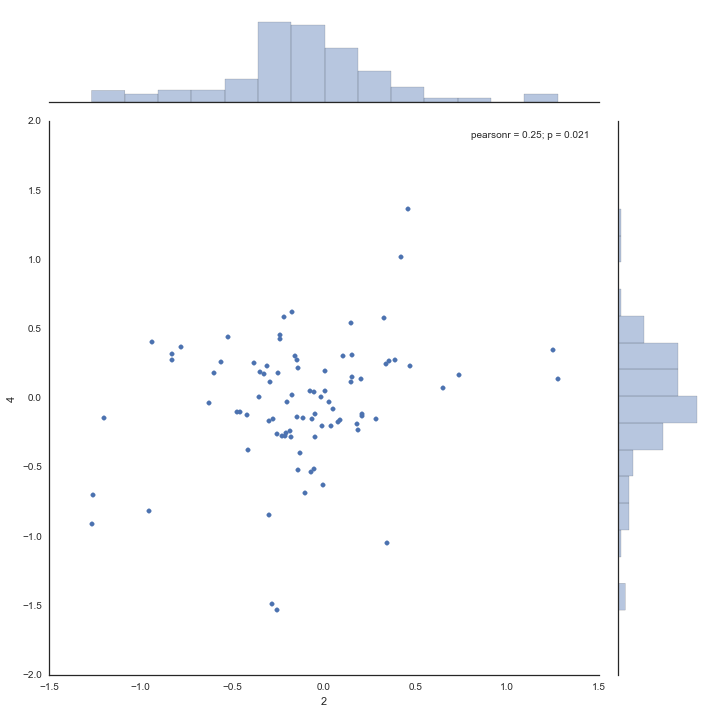

In [153]:
sns.jointplot(data=AFL_PT,x=2,y=4,size=10)

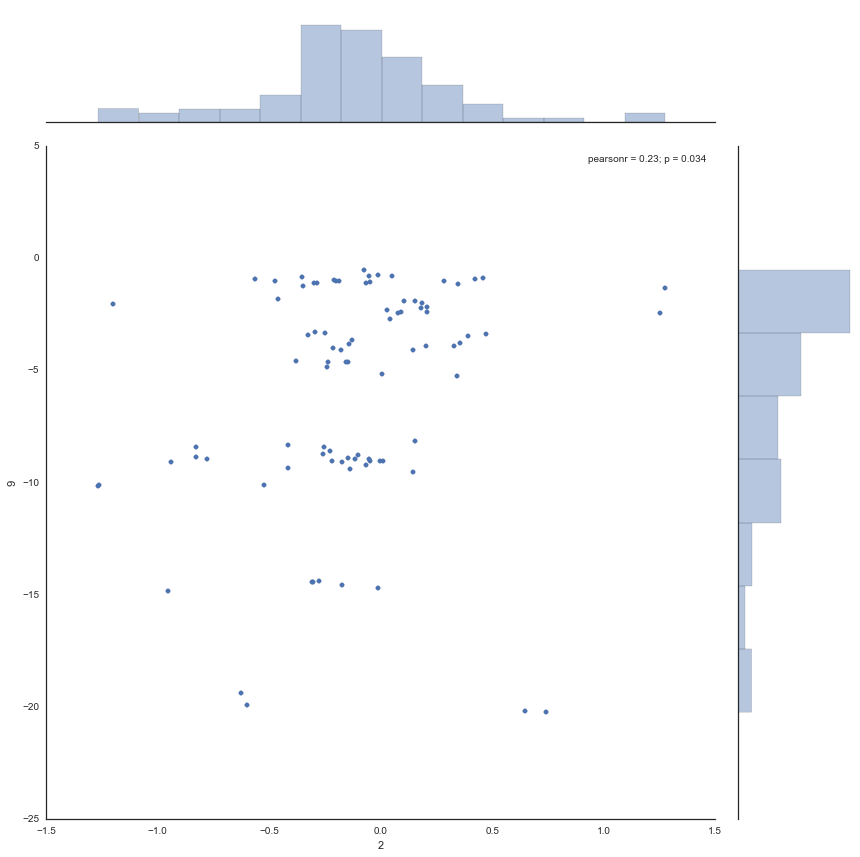

In [159]:
sns.jointplot(data=AFL_PT,x=2,y=9,size=12)

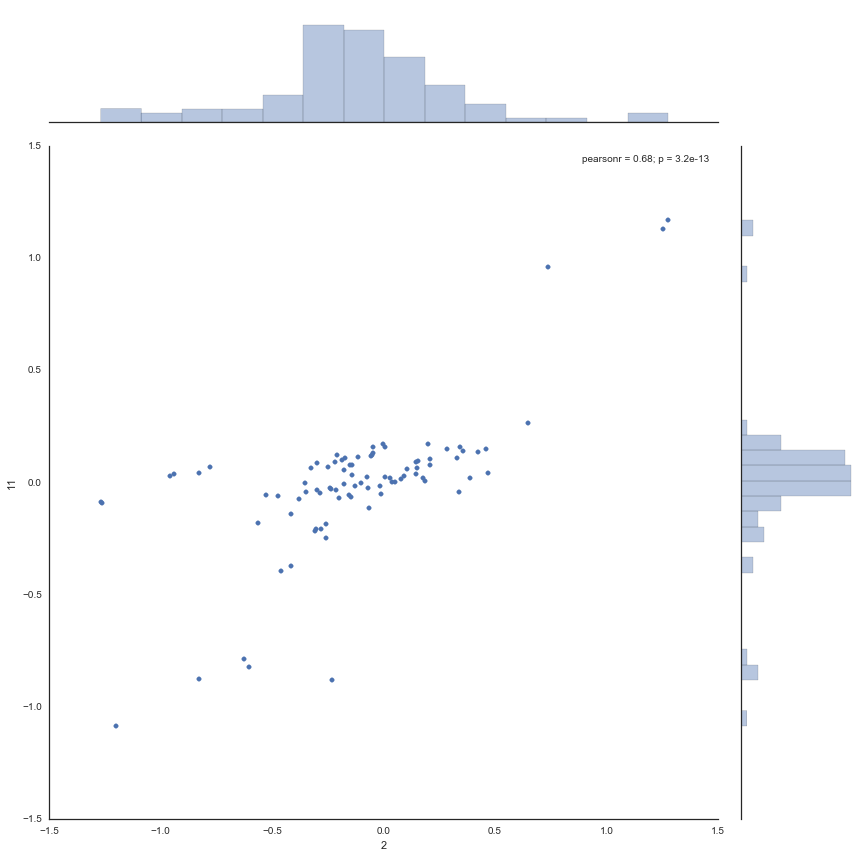

In [160]:
sns.jointplot(data=AFL_PT,x=2,y=11,size=12)

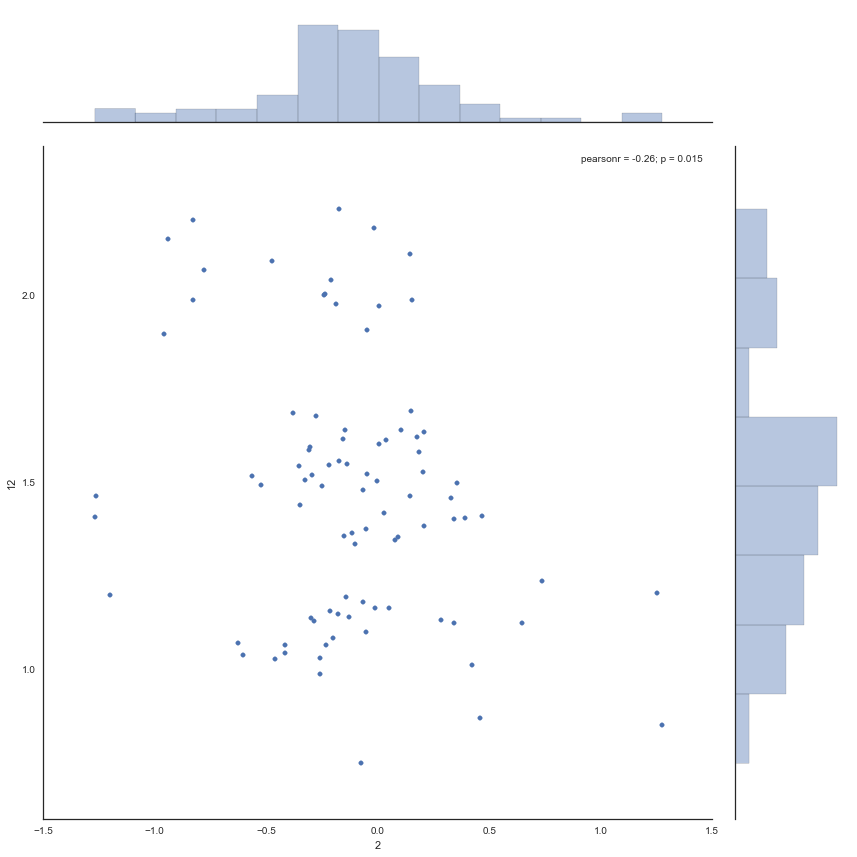

In [168]:
sns.jointplot(data=AFL_PT,x=2,y=12,size=12)

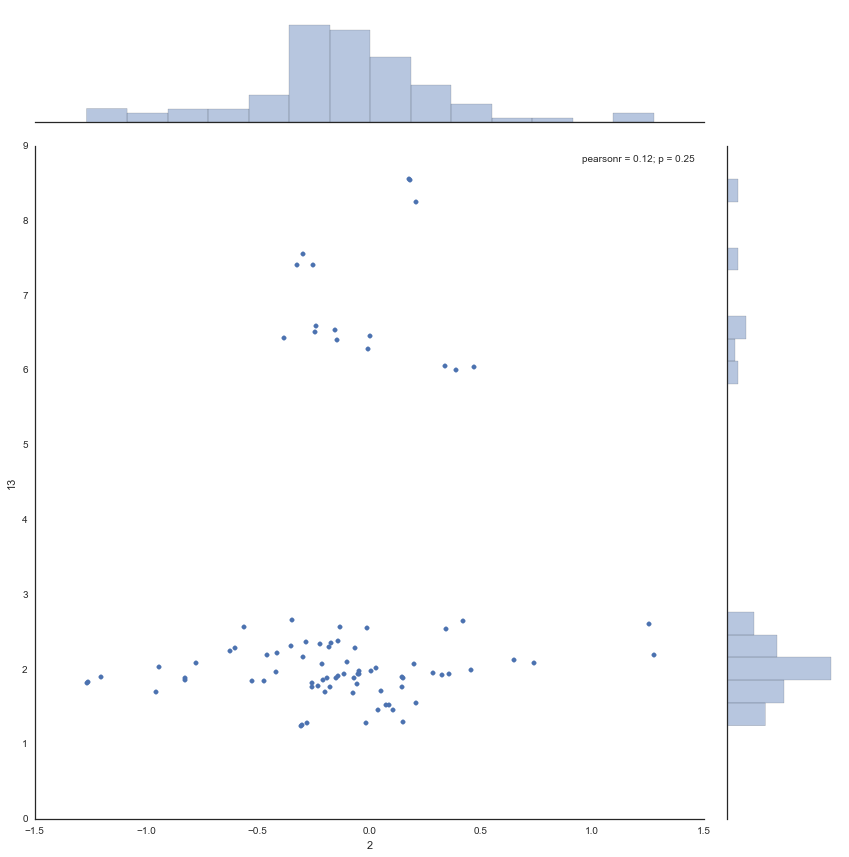

In [169]:
sns.jointplot(data=AFL_PT,x=2,y=13,size=12)

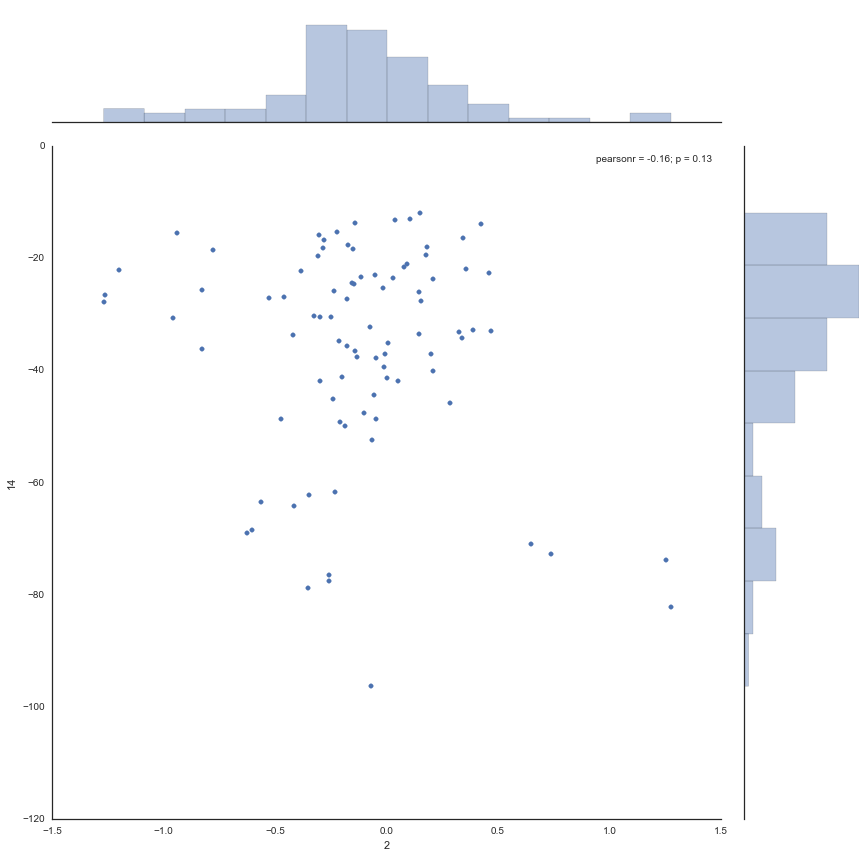

In [170]:
sns.jointplot(data=AFL_PT,x=2,y=14,size=12)